<a href="https://colab.research.google.com/github/vaibhavb/zero-to-one-datascience-to-ai/blob/main/005_Logistic_Regression_With_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Data

## Kaggle

In [1]:
import kagglehub
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


## Data Transformation

In [2]:
titanic_path = kagglehub.competition_download('titanic')
train_df = pd.read_csv(titanic_path + "/train.csv")
df_processed = train_df.copy()
df_processed.drop('Cabin', axis=1, inplace=True)
median_age = df_processed['Age'].median() #median
df_processed.fillna({'Age': median_age}, inplace=True)
mode_embarked = df_processed['Embarked'].mode()[0] #mode returns a series so we take first
df_processed.fillna({'Embarked': mode_embarked}, inplace=True)
df_model_ready = df_processed.copy()
df_model_ready = pd.get_dummies(df_model_ready, columns=['Sex'], prefix='Sex', drop_first=True)
df_model_ready = pd.get_dummies(df_model_ready, columns=['Embarked'], prefix='Embarked', drop_first=True)
columns_to_drop_for_model = ['Name', 'Ticket', 'PassengerId', 'SibSp', 'Parch']
df_model_ready.drop(columns=columns_to_drop_for_model, axis=1, inplace=True)
potential_numerical_cols = df_model_ready.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude_from_scaling = ['Survived']
numerical_cols_for_scaling = [col for col in potential_numerical_cols if col not in cols_to_exclude_from_scaling]
scaler = StandardScaler()
df_model_ready[numerical_cols_for_scaling] = scaler.fit_transform(df_model_ready[numerical_cols_for_scaling])
print("\nDescriptive stats of scaled features (should have mean ~0, std ~1):")
print(df_model_ready[numerical_cols_for_scaling].describe())

100%|██████████| 34.1k/34.1k [00:00<00:00, 14.2MB/s]

Extracting files...

Descriptive stats of scaled features (should have mean ~0, std ~1):
             Pclass           Age          Fare
count  8.910000e+02  8.910000e+02  8.910000e+02
mean  -8.772133e-17  2.272780e-16  3.987333e-18
std    1.000562e+00  1.000562e+00  1.000562e+00
min   -1.566107e+00 -2.224156e+00 -6.484217e-01
25%   -3.693648e-01 -5.657365e-01 -4.891482e-01
50%    8.273772e-01 -1.046374e-01 -3.573909e-01
75%    8.273772e-01  4.333115e-01 -2.424635e-02
max    8.273772e-01  3.891554e+00  9.667167e+00


## Splitting Dataset

In [ ]:
X = df_model_ready.drop('Survived', axis=1)
y = df_model_ready['Survived']
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,    # 20% for validation, 80% for training
    random_state=42,  # The answer to life, the universe, and everything - for consistency
    stratify=y        # Important for classification if y has more than 1 class and is not empty
)
print("\nShapes of the resulting data splits:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

# Implementation with Scikit-learn

In [3]:
# Ensure necessary libraries and data are loaded from previous lessons
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression # Changed from LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
# import matplotlib.pyplot as plt # For potential plotting if needed

# --- Assume X_train, y_train, X_val, y_val are pre-existing Pandas DataFrames/Series ---
# For this script to be runnable standalone, let's create dummy preprocessed data
# In your actual workflow, you'd use the data from your previous lessons.
if 'X_train' not in locals() or 'y_train' not in locals():
    print("--- X_train, y_train not found. Creating dummy preprocessed data for Lesson 5. ---")
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    num_samples = 891
    num_features = 8
    dummy_X_data = np.random.rand(num_samples, num_features)
    feature_names = [f'feature_{i}' for i in range(num_features)]
    X_full = pd.DataFrame(dummy_X_data, columns=feature_names)
    scaler = StandardScaler()
    X_scaled_data = scaler.fit_transform(X_full)
    X_full_scaled = pd.DataFrame(X_scaled_data, columns=feature_names)
    y_full = pd.Series(np.random.randint(0, 2, num_samples), name='Survived')
    X_train, X_val, y_train, y_val = train_test_split(
        X_full_scaled, y_full, test_size=0.2, random_state=42, stratify=y_full
    )
    print(f"Dummy X_train shape: {X_train.shape}, Dummy y_train shape: {y_train.shape}")

# 1. Initialize the Logistic Regression model
# Common parameters:
# solver: Algorithm to use in the optimization problem. Default is 'lbfgs'.
#         'liblinear' is good for small datasets. 'saga' supports L1 and L2.
# C: Inverse of regularization strength; smaller values specify stronger regularization. Default is 1.0.
# max_iter: Maximum number of iterations taken for the solvers to converge.
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=200)
# 2. Train the model
# Scikit-learn's LogisticRegression expects y_train to be a 1D array or Series.
print("\n--- Training Logistic Regression Model (Scikit-learn) ---")
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained.")

# You can inspect the learned coefficients (weights) and intercept if interested
# print(f"Coefficients (W): {log_reg_model.coef_}")
# print(f"Intercept (b): {log_reg_model.intercept_}")

# 3. Make predictions
# .predict() gives class labels directly (0 or 1)
y_pred_class_train_logreg = log_reg_model.predict(X_train)
y_pred_class_val_logreg = log_reg_model.predict(X_val)

# .predict_proba() gives probabilities for each class [P(class=0), P(class=1)]
y_pred_proba_val_logreg = log_reg_model.predict_proba(X_val)

print("\nFirst 5 class predictions (0 or 1) on validation set:")
print(y_pred_class_val_logreg[:5])
print("\nFirst 5 probability predictions [P(Died), P(Survived)] on validation set:")
print(y_pred_proba_val_logreg[:5])
# We are interested in P(Survived), which is the second column
print("\nFirst 5 probabilities of 'Survived' on validation set:")
print(y_pred_proba_val_logreg[:5, 1])


--- X_train, y_train not found. Creating dummy preprocessed data for Lesson 5. ---
Dummy X_train shape: (712, 8), Dummy y_train shape: (712,)

--- Training Logistic Regression Model (Scikit-learn) ---
Logistic Regression model trained.

First 5 class predictions (0 or 1) on validation set:
[0 1 0 1 1]

First 5 probability predictions [P(Died), P(Survived)] on validation set:
[[0.51140449 0.48859551]
 [0.46736111 0.53263889]
 [0.57433672 0.42566328]
 [0.47277332 0.52722668]
 [0.44021889 0.55978111]]

First 5 probabilities of 'Survived' on validation set:
[0.48859551 0.53263889 0.42566328 0.52722668 0.55978111]


# Evaluation

In [4]:
print("\n--- Logistic Regression Model Evaluation (Scikit-learn) ---")

# Accuracy
train_accuracy_logreg = accuracy_score(y_train, y_pred_class_train_logreg)
val_accuracy_logreg = accuracy_score(y_val, y_pred_class_val_logreg)
print(f"Training Accuracy: {train_accuracy_logreg*100:.2f}%")
print(f"Validation Accuracy: {val_accuracy_logreg*100:.2f}%")

# Confusion Matrix for Validation Set
print("\nValidation Set Confusion Matrix:")
cm_logreg = confusion_matrix(y_val, y_pred_class_val_logreg)
print(cm_logreg)
# For better display:
TN = cm_logreg[0,0]; FP = cm_logreg[0,1]
FN = cm_logreg[1,0]; TP = cm_logreg[1,1]
print(f"TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}")


# Precision, Recall, F1-Score for Validation Set
if len(np.unique(y_val)) > 1: # Ensure there are positive and negative classes in true labels
    precision_logreg = precision_score(y_val, y_pred_class_val_logreg, zero_division=0)
    recall_logreg = recall_score(y_val, y_pred_class_val_logreg, zero_division=0)
    f1_logreg = f1_score(y_val, y_pred_class_val_logreg, zero_division=0)
    print(f"Validation Precision: {precision_logreg:.4f}")
    print(f"Validation Recall: {recall_logreg:.4f}")
    print(f"Validation F1-Score: {f1_logreg:.4f}")
else:
    print("Could not calculate Precision/Recall/F1 for validation set (e.g., only one class in true labels).")


--- Logistic Regression Model Evaluation (Scikit-learn) ---
Training Accuracy: 55.48%
Validation Accuracy: 41.34%

Validation Set Confusion Matrix:
[[33 56]
 [49 41]]
TN: 33, FP: 56, FN: 49, TP: 41
Validation Precision: 0.4227
Validation Recall: 0.4556
Validation F1-Score: 0.4385


# ROC Curve and AUC Score
Good for evaluating probability-based classifiers

Validation AUC Score: 0.4453


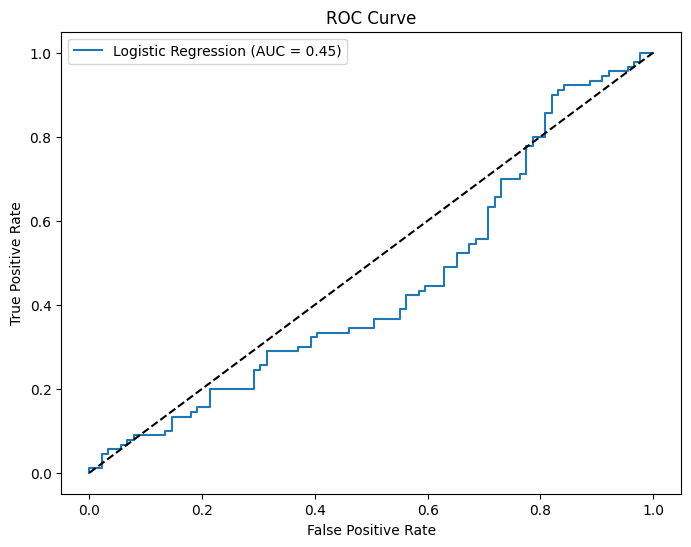

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba_survived_val = y_pred_proba_val_logreg[:, 1] # Probabilities for the positive class (Survived)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_survived_val)
auc_score = roc_auc_score(y_val, y_pred_proba_survived_val)
print(f"Validation AUC Score: {auc_score:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--') # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Discussion
- Performance: Compare the Scikit-learn Logistic Regression's performance (accuracy, F1-score) to the from-scratch version (Lesson 4). The Scikit-learn version is likely to be similar or slightly better due to optimized solvers and default regularization.
- Ease of Use: Note how few lines of code are needed to train and predict with Scikit-learn.
- Interpretability: Logistic Regression coefficients can be interpreted in terms of log-odds, providing some insight into feature importance (though less direct than linear regression coefficients for continuous outcomes).
- Baseline Model: Logistic Regression is often a good baseline model for classification tasks. If more complex models (like neural networks) don't significantly outperform it, the simpler model might be preferred.

